In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action="ignore")

import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
plt.rc("font", family=font_name)

import matplotlib as mpl
mpl.rcParams["axes.unicode_minus"] = False


import urllib.request as req
from urllib.request import urlopen
from urllib.error import HTTPError,URLError
import urllib.parse
from bs4 import BeautifulSoup
import requests

# 1. 시카고 샌드위치 맛집 분석

+ http://www.chicagomag.com/Chicago-Magazine/November-2012/Best-Sandwiches-Chicago


In [4]:
url = "http://www.chicagomag.com/Chicago-Magazine/November-2012/Best-Sandwiches-Chicago"

headers = {"User-Agent" : "Mozilla/5.0"}
page = requests.get(url,headers=headers)
page

soup = BeautifulSoup(page.text,"html.parser")
soup



<!DOCTYPE html>

<html lang="en-US">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible">
<link href="https://gmpg.org/xfn/11" rel="profile"/>
<title>The 50 Best Sandwiches in Chicago – Chicago Magazine</title>
<style type="text/css">			.heateorSssInstagramBackground{background:radial-gradient(circle at 30% 107%,#fdf497 0,#fdf497 5%,#fd5949 45%,#d6249f 60%,#285aeb 90%)}
						div.heateor_sss_horizontal_sharing i.heateorSssInstagramBackground{background:#000!important;}div.heateor_sss_standard_follow_icons_container i.heateorSssInstagramBackground{background:#000;}
										.heateor_sss_horizontal_sharing .heateorSssSharing,.heateor_sss_standard_follow_icons_container .heateorSssSharing{
							background-color: #000;
							color: #fff;
						border-width: 0px;
			border-style: solid;
			border-color: transparent;
		}
				.heateor_sss_horizontal_sharing .heateorSssTCBackground{
			color:#666;
		}
				.heateor_sss_horizontal_sharing .heateorSssSharing:ho

In [5]:
len(soup.find_all("div","sammy"))


50

In [6]:
soup.find_all("div","sammy")[0]

<div class="sammy" style="position: relative;">
<div class="sammyRank">1</div>
<div class="sammyListing"><a href="/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Old-Oak-Tap-BLT/"><b>BLT</b><br/>
Old Oak Tap<br/>
<em>Read more</em> </a></div>
</div>

# (2) parsing

In [7]:
################# 50개 데이터 중에서 첫 번째 데이터 가져오기
one =soup.find_all("div","sammy")[0]
print(type(one))
print(one)

<class 'bs4.element.Tag'>
<div class="sammy" style="position: relative;">
<div class="sammyRank">1</div>
<div class="sammyListing"><a href="/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Old-Oak-Tap-BLT/"><b>BLT</b><br/>
Old Oak Tap<br/>
<em>Read more</em> </a></div>
</div>


In [8]:
####### 첫번째 데이터 중에서 랭킹 가져오기


one.find(class_="sammyRank").get_text()


'1'

In [9]:
#### 메뉴 이름과 가게 이름 가져오기

one_list = one.find(class_="sammyListing").get_text().split("\n")
print(one_list)

['BLT', 'Old Oak Tap', 'Read more ']


In [10]:
## a태그에서 href 값 가져오기
url = one.a["href"]

base ="http://www.chicagomag.com"
print(base+url)

print(urllib.parse.urljoin(base,url))

http://www.chicagomag.com/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Old-Oak-Tap-BLT/
http://www.chicagomag.com/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Old-Oak-Tap-BLT/


# 3 데이터 수집

+ rank
+ main_menu
+ cafe_name
+ readmore


In [11]:
rank =[]
main_menu = []
cafe_name =[]
readmore = []
url_base ="http://www.chicagomag.com"

cafes = soup.find_all("div","sammy")
for item in cafes:
    rank.append(item.find(class_="sammyRank").get_text())
    
    temp = item.find(class_="sammyListing").get_text().split("\n")
    main_menu.append(temp[0])
    cafe_name.append(temp[1])
    
    readmore.append(urllib.parse.urljoin(url_base,item.find("a")["href"]))

In [12]:
len(rank), len(main_menu), len(cafe_name) , len(readmore)

(50, 50, 50, 50)

In [13]:
####### 데이터 프레임 저장

data= {"Rank":rank, "Cafe":cafe_name, "Menu":main_menu, "ReadMore":readmore}
df = pd.DataFrame(data)
df.head()


,Rank,Cafe,Menu,ReadMore
0,1,Old Oak Tap,BLT,http://www.chicagomag.com/Chicago-Magazine/Nov...
1,2,Au Cheval,Fried Bologna,http://www.chicagomag.com/Chicago-Magazine/Nov...
2,3,Xoco,Woodland Mushroom,http://www.chicagomag.com/Chicago-Magazine/Nov...
3,4,Al’s Deli,Roast Beef,http://www.chicagomag.com/Chicago-Magazine/Nov...
4,5,Publican Quality Meats,PB&L,http://www.chicagomag.com/Chicago-Magazine/Nov...


In [78]:
##### 상세 페이지에서 가격과 주소 가져오기

url = df["ReadMore"][0]


headers = {"User-Agent" : "Mozilla/5.0"}
page = requests.get(url,headers=headers)
soup = BeautifulSoup(page.text,"html.parser")

detail= soup.find("p",class_="addy").get_text()

print(detail)

print("-----------------------------------------")
detail_split = detail.split()
print(detail_split)
print("-----------------------------------------")

#가격
print(detail_split[0])
print("-----------------------------------------")
print(detail_split[0][:-1])

#주소
print("-----------------------------------------")
print(detail_split[ 1: -2])


$10. 2109 W. Chicago Ave., 773-772-0406, theoldoaktap.com
-----------------------------------------
['$10.', '2109', 'W.', 'Chicago', 'Ave.,', '773-772-0406,', 'theoldoaktap.com']
-----------------------------------------
$10.
-----------------------------------------
$10
-----------------------------------------
['2109', 'W.', 'Chicago', 'Ave.,']


In [79]:
#### 50개의 점포의 가격과 주소 수집

from tqdm import tqdm_notebook # 시간 막대기 

price = []
address = []

for n in tqdm_notebook(df.index):
    page = requests.get(df["ReadMore"][n], headers=headers)
    soup = BeautifulSoup(page.text, "html.parser")
    
    detail = soup.find("p", class_="addy").get_text()
    
    price.append(detail.split()[0][:-1])
    address.append(" ".join(detail.split()[1 : -2]))

  0%|          | 0/50 [00:00<?, ?it/s]

In [95]:
print(len(price) , len(address))
print(price[:5])
print(address[:5])

50 50
['$10', '$9', '$9.50', '$9.40', '$10']
['2109 W. Chicago Ave.,', '800 W. Randolph St.,', '445 N. Clark St.,', '914 Noyes St., Evanston,', '825 W. Fulton Mkt.,']


In [96]:
df["Price"] = price
df["Address"] = address
df.head()

,Rank,Cafe,Menu,ReadMore,Price,Address
0,1,Old Oak Tap,BLT,http://www.chicagomag.com/Chicago-Magazine/Nov...,$10,"2109 W. Chicago Ave.,"
1,2,Au Cheval,Fried Bologna,http://www.chicagomag.com/Chicago-Magazine/Nov...,$9,"800 W. Randolph St.,"
2,3,Xoco,Woodland Mushroom,http://www.chicagomag.com/Chicago-Magazine/Nov...,$9.50,"445 N. Clark St.,"
3,4,Al’s Deli,Roast Beef,http://www.chicagomag.com/Chicago-Magazine/Nov...,$9.40,"914 Noyes St., Evanston,"
4,5,Publican Quality Meats,PB&L,http://www.chicagomag.com/Chicago-Magazine/Nov...,$10,"825 W. Fulton Mkt.,"


In [97]:
########## Checkpoint

df.to_csv("data/sandwiches_final.csv", encoding="utf-8")

In [98]:
df= pd.read_csv("data/sandwiches_final.csv", index_col=0)
df.head()

,Rank,Cafe,Menu,ReadMore,Price,Address
0,1,Old Oak Tap,BLT,http://www.chicagomag.com/Chicago-Magazine/Nov...,$10,"2109 W. Chicago Ave.,"
1,2,Au Cheval,Fried Bologna,http://www.chicagomag.com/Chicago-Magazine/Nov...,$9,"800 W. Randolph St.,"
2,3,Xoco,Woodland Mushroom,http://www.chicagomag.com/Chicago-Magazine/Nov...,$9.50,"445 N. Clark St.,"
3,4,Al’s Deli,Roast Beef,http://www.chicagomag.com/Chicago-Magazine/Nov...,$9.40,"914 Noyes St., Evanston,"
4,5,Publican Quality Meats,PB&L,http://www.chicagomag.com/Chicago-Magazine/Nov...,$10,"825 W. Fulton Mkt.,"


In [99]:
df = pd.read_csv("data/sandwiches_map.csv",index_col=0)
df.head()

,Menu,Cafe,ReadMore,Price,Address,Latitude,Longitude
Rank,,,,,,,
1,BLT,Old Oak Tap,https://www.chicagomag.com/Chicago-Magazine/No...,$10,2109 W. Chicago Ave.,41.895605,-87.679961
2,Fried Bologna,Au Cheval,https://www.chicagomag.com/Chicago-Magazine/No...,$9,800 W. Randolph St.,41.884658,-87.647667
3,Woodland Mushroom,Xoco,https://www.chicagomag.com/Chicago-Magazine/No...,$9.50,445 N. Clark St.,41.890523,-87.630783
4,Roast Beef,Al’s Deli,https://www.chicagomag.com/Chicago-Magazine/No...,$9.40,914 Noyes St.,42.058322,-87.683748
5,PB&L,Publican Quality Meats,https://www.chicagomag.com/Chicago-Magazine/No...,$10,825 W. Fulton Mkt.,41.886604,-87.648536


In [100]:
import folium

map = folium.Map(location=[df["Latitude"].mean(), df["Longitude"].mean()], zoom_start=11)
folium.Marker([df["Latitude"].mean(), df["Longitude"].mean()],popup="center").add_to(map) # 포인트
map


# 2.네이버 영화 평점 기준으로 영화평점 변화 분석

+ http://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&date=20170806


In [6]:
url = "https://movie.naver.com/movie/sdb/rank/rmovie.naver?sel=cur&date=20170806"
page = urlopen(url)
soup = BeautifulSoup(page,"html.parser")
soup


# div 태그란? div 태그는 'Content Division element' 로서, 단어의 뜻처럼 웹 페이지의 내용을 '나누는' 데에 주로 사용됩니다.



# 영화 제목만 수집

print(soup.find_all("div","tit5")[0])
print(len(soup.find_all("div","tit5")))
print(soup.find_all("div","tit5")[0].get_text())

print('------------------------------------------')

# 평점 수집
print(soup.find_all("td","point")[0].get_text())
print(len(soup.find_all("td","point")))

# 47개의 영화 제목과 평점을 리스트 저장

movie_name = [soup.find_all("div","tit5")[i].get_text() for i in range(47)]

movie_point = [soup.find_all("td","point")[i].get_text() for i in range(47)]

print(movie_name)
print(movie_point)

<div class="tit5">
<a href="/movie/bi/mi/basic.naver?code=62586" title="다크 나이트">다크 나이트</a>
</div>
47

다크 나이트

------------------------------------------
9.32
47
['\n다크 나이트\n', '\n킹 오브 프리즘 프라이드 더 히어로\n', '\n킹 오브 프리즘\n', '\n내 사랑\n', '\n오즈의 마법사\n', '\n서서평, 천천히 평온하게\n', '\n로보캅\n', '\n플립\n', '\n헤드윅\n', '\n댄서\n', '\n이터널 선샤인\n', '\n명탐정 코난:진홍의 연가\n', '\n샤인\n', '\n택시운전사\n', '\n올드보이\n', '\n어네스트와 셀레스틴\n', '\n기쿠지로의 여름\n', '\n파도가 지나간 자리\n', '\n노무현입니다\n', '\n파이트 클럽\n', '\n스타쉽 트루퍼스\n', '\n청원\n', '\n토탈 리콜\n', '\n극장판 짱구는 못말려 : 습격!! 외계인 덩덩이\n', '\n너의 이름은.\n', '\n연애담\n', '\n슈퍼배드 3\n', '\n꿈의 제인\n', '\n심야식당2\n', '\n라라랜드\n', '\n카3: 새로운 도전\n', '\n오두막\n', '\n스파이더맨: 홈커밍\n', '\n옥자\n', '\n500일의 썸머\n', '\n복수는 나의 것\n', '\n덩케르크\n', '\n예수는 역사다\n', '\n매치 포인트\n', '\n7번째 내가 죽던 날\n', '\n47 미터\n', '\n친절한 금자씨\n', '\n송 투 송\n', '\n그 후\n', '\n박쥐\n', '\n싸이보그지만 괜찮아\n', '\n군함도\n']
['9.32', '9.27', '9.25', '9.24', '9.23', '9.23', '9.21', '9.20', '9.18', '9.14', '9.10', '9.10', '9.09', '9.08', '9.05', '9.05', '9.02', '9.00', '8.9

# (1) 데이터 수집

+ 2017년 5월 15일부터 100일간의 데이터 수집

In [7]:
##### 날짜 인덱스 생성

daterange = pd.date_range("2017-5",periods=100, freq="D")
daterange

DatetimeIndex(['2017-05-01', '2017-05-02', '2017-05-03', '2017-05-04',
               '2017-05-05', '2017-05-06', '2017-05-07', '2017-05-08',
               '2017-05-09', '2017-05-10', '2017-05-11', '2017-05-12',
               '2017-05-13', '2017-05-14', '2017-05-15', '2017-05-16',
               '2017-05-17', '2017-05-18', '2017-05-19', '2017-05-20',
               '2017-05-21', '2017-05-22', '2017-05-23', '2017-05-24',
               '2017-05-25', '2017-05-26', '2017-05-27', '2017-05-28',
               '2017-05-29', '2017-05-30', '2017-05-31', '2017-06-01',
               '2017-06-02', '2017-06-03', '2017-06-04', '2017-06-05',
               '2017-06-06', '2017-06-07', '2017-06-08', '2017-06-09',
               '2017-06-10', '2017-06-11', '2017-06-12', '2017-06-13',
               '2017-06-14', '2017-06-15', '2017-06-16', '2017-06-17',
               '2017-06-18', '2017-06-19', '2017-06-20', '2017-06-21',
               '2017-06-22', '2017-06-23', '2017-06-24', '2017-06-25',
      

In [8]:
from tqdm import tqdm_notebook

movie_date =[]
movie_name = []
movie_point = []

for today in tqdm_notebook(daterange):
    url = "https://movie.naver.com/movie/sdb/rank/rmovie.naver?sel=cur&date={}"
    page = urlopen(url.format(today.strftime("%Y%m%d")))
    soup = BeautifulSoup(page, "html.parser")
    
    cnt = len(soup.find_all("td","point"))
    
    movie_date.extend([today for n in range(cnt)])
    movie_name.extend(soup.find_all("div","tit5")[n].get_text().strip("\n")for n in range(cnt)) # strip 제거
    movie_point.extend([soup.find_all("td","point")[n].get_text().strip("\n") for n in range(cnt)])

  0%|          | 0/100 [00:00<?, ?it/s]

In [10]:
len(movie_date) , len(movie_name), len(movie_point)

(4723, 4723, 4723)

In [11]:
movie= pd.DataFrame({"date":movie_date,"name":movie_name,"point":movie_point})
movie.head(5)

,date,name,point
0,2017-05-01,히든 피겨스,9.38
1,2017-05-01,사운드 오브 뮤직,9.36
2,2017-05-01,시네마 천국,9.29
3,2017-05-01,미스 슬로운,9.26
4,2017-05-01,잉여들의 히치하이킹,9.25


In [12]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4723 entries, 0 to 4722
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    4723 non-null   datetime64[ns]
 1   name    4723 non-null   object        
 2   point   4723 non-null   object        
dtypes: datetime64[ns](1), object(2)
memory usage: 110.8+ KB


In [13]:
movie["point"] = movie["point"].astype(float)
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4723 entries, 0 to 4722
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    4723 non-null   datetime64[ns]
 1   name    4723 non-null   object        
 2   point   4723 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 110.8+ KB


In [28]:
##### 영화별로 점수의 합계를 조회(평점의 합계가 높은 순 또는 낮은 순으로 10개씩)
m_point = pd.pivot_table(movie,index=["name"],aggfunc=np.sum)
m_point.sort_values(by="point",ascending=False).head(10)



,point
name,
댄서,914.60
"서서평, 천천히 평온하게",889.64
오두막,861.65
라라랜드,858.89
너의 이름은.,738.42
노무현입니다,682.24
보스 베이비,644.21
겟 아웃,630.62
기쿠지로의 여름,613.43


In [29]:
movie.groupby("name").sum()[["point"]].sort_values("point",ascending=False).head(10)
##### 특정 영화만 골라서 조회(예를 들어 겟아웃을 10개까지10일치만 조회)
getout = movie.query("name == ['겟 아웃']")
getout.head(10)
getout.tail(10)

getout= movie[movie["name"]=='겟 아웃']
getout.head(10)

,date,name,point
833,2017-05-17,겟 아웃,8.36
889,2017-05-18,겟 아웃,8.18
933,2017-05-19,겟 아웃,8.20
980,2017-05-20,겟 아웃,8.18
1022,2017-05-21,겟 아웃,8.18
1061,2017-05-22,겟 아웃,8.11
1102,2017-05-23,겟 아웃,8.15
1146,2017-05-24,겟 아웃,8.15
1192,2017-05-25,겟 아웃,8.15
1236,2017-05-26,겟 아웃,8.16


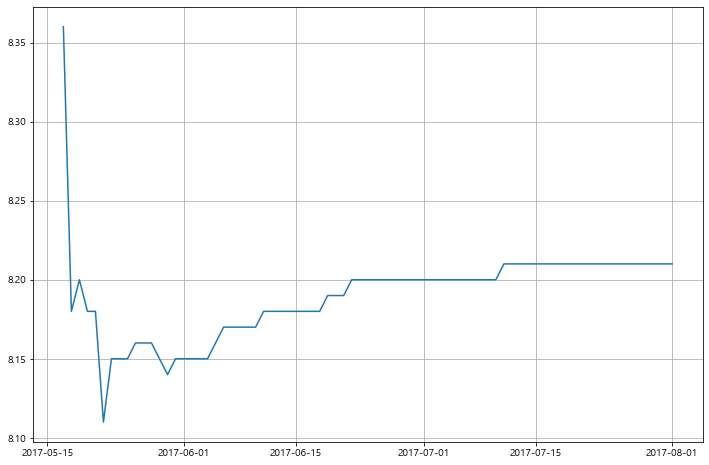

In [32]:
#### 위에 조회한 영화에 대해 날짜별 평점으로 시각화(선 그래프)
plt.figure(figsize=(12,8))
plt.plot(getout["date"],getout["point"])
plt.grid()



In [42]:
### 영화별 날짜 변화에 따른 평점 변화를 확인( 데이터 프레임 구성)
movie2 = movie.pivot_table(index=["date"],columns=["name"],values=["point"])
movie2.head()


movie2.columns = movie2.columns.droplevel()
movie2.head() #point 빼기

name,10분,47 미터,500일의 썸머,7년-그들이 없는 언론,7번째 내가 죽던 날,7인의 사무라이,8 마일,가디언즈 오브 갤럭시,가디언즈 오브 갤럭시 VOL. 2,겟 아웃,...,하울의 움직이는 성,하이큐!! 끝과 시작,한공주,해리가 샐리를 만났을 때,핵소 고지,행복 목욕탕,헤드윅,환상의 빛,흑집사 : 북 오브 더 아틀란틱,히든 피겨스
date,,,,,,,,,,,,,,,,,,,,,
2017-05-01,8.89,NaN,NaN,NaN,NaN,NaN,NaN,8.56,NaN,NaN,...,NaN,NaN,8.78,8.89,NaN,8.70,NaN,NaN,9.20,9.38
2017-05-02,8.89,NaN,NaN,NaN,NaN,NaN,NaN,8.56,NaN,NaN,...,NaN,NaN,8.78,8.89,NaN,8.68,NaN,NaN,9.21,9.37
2017-05-03,8.89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.22,NaN,...,NaN,NaN,8.78,8.89,NaN,8.70,NaN,NaN,9.22,9.38
2017-05-04,8.89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.15,NaN,...,NaN,NaN,8.78,NaN,NaN,8.67,NaN,NaN,9.23,9.38
2017-05-05,8.89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.08,NaN,...,NaN,NaN,8.78,NaN,NaN,8.69,NaN,NaN,9.24,9.37


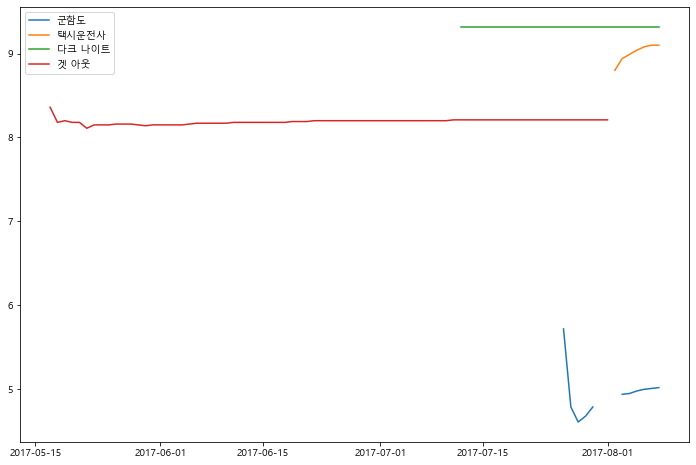

In [49]:
### 몇개의 영화를 뽑아서 평점 변화에 따른 시각화 구현(하나의 선 그래프로 구현)

target = ["군함도","택시운전사","다크 나이트","겟 아웃"]
plt.figure(figsize=(12,8))
plt.plot(movie2[target])
plt.legend(target,loc="best")

